In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
# Getting the data:
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

'housing (1).csv'

In [4]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,"452,600.0000",NEAR BAY
1,-122.2200,37.8600,21.0000,"7,099.0000","1,106.0000","2,401.0000","1,138.0000",8.3014,"358,500.0000",NEAR BAY
2,-122.2400,37.8500,52.0000,"1,467.0000",190.0000,496.0000,177.0000,7.2574,"352,100.0000",NEAR BAY
3,-122.2500,37.8500,52.0000,"1,274.0000",235.0000,558.0000,219.0000,5.6431,"341,300.0000",NEAR BAY
4,-122.2500,37.8500,52.0000,"1,627.0000",280.0000,565.0000,259.0000,3.8462,"342,200.0000",NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.0900,39.4800,25.0000,"1,665.0000",374.0000,845.0000,330.0000,1.5603,"78,100.0000",INLAND
20636,-121.2100,39.4900,18.0000,697.0000,150.0000,356.0000,114.0000,2.5568,"77,100.0000",INLAND
20637,-121.2200,39.4300,17.0000,"2,254.0000",485.0000,"1,007.0000",433.0000,1.7000,"92,300.0000",INLAND
20638,-121.3200,39.4300,18.0000,"1,860.0000",409.0000,741.0000,349.0000,1.8672,"84,700.0000",INLAND


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# filling missing values with 0:
df = df.fillna(0)

In [7]:
# new features:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [8]:
# Q1: What is the most frequent observation (mode) for the column ocean_proximity?
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df[[x for x in list(df.columns) if x not in ['median_house_value']]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,NEAR BAY,6.9841,0.1466,2.5556
1,-122.2200,37.8600,21.0000,"7,099.0000","1,106.0000","2,401.0000","1,138.0000",8.3014,NEAR BAY,6.2381,0.1558,2.1098
2,-122.2400,37.8500,52.0000,"1,467.0000",190.0000,496.0000,177.0000,7.2574,NEAR BAY,8.2881,0.1295,2.8023
3,-122.2500,37.8500,52.0000,"1,274.0000",235.0000,558.0000,219.0000,5.6431,NEAR BAY,5.8174,0.1845,2.5479
4,-122.2500,37.8500,52.0000,"1,627.0000",280.0000,565.0000,259.0000,3.8462,NEAR BAY,6.2819,0.1721,2.1815
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.0900,39.4800,25.0000,"1,665.0000",374.0000,845.0000,330.0000,1.5603,INLAND,5.0455,0.2246,2.5606
20636,-121.2100,39.4900,18.0000,697.0000,150.0000,356.0000,114.0000,2.5568,INLAND,6.1140,0.2152,3.1228
20637,-121.2200,39.4300,17.0000,"2,254.0000",485.0000,"1,007.0000",433.0000,1.7000,INLAND,5.2055,0.2152,2.3256
20638,-121.3200,39.4300,18.0000,"1,860.0000",409.0000,741.0000,349.0000,1.8672,INLAND,5.3295,0.2199,2.1232


In [10]:
# splitting data:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = df_train['median_house_value']
y_test = df_test['median_house_value']
y_val = df_val['median_house_value']

df_train = df_train[[x for x in list(df.columns) if x not in ['median_house_value']]]
df_test = df_test[[x for x in list(df.columns) if x not in ['median_house_value']]]
df_val = df_val[[x for x in list(df.columns) if x not in ['median_house_value']]]

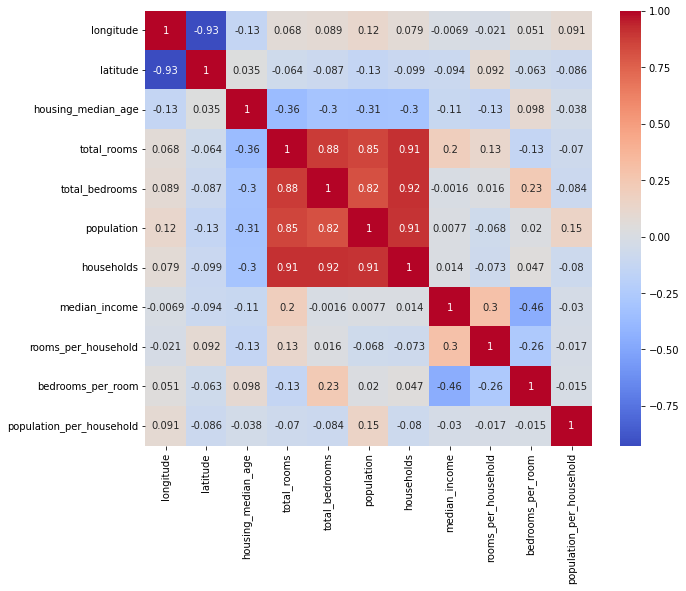

In [11]:
# Q2: What are the two features that have the biggest correlation in this dataset?
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,8))
sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm');

In [12]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.0000,-0.9247,-0.1082,0.0446,0.0681,0.0998,0.0553,-0.0152,-0.0460,-0.0275,0.0848,0.0025
latitude,-0.9247,1.0000,0.0112,-0.0361,-0.0653,-0.1088,-0.0710,-0.0798,-0.1442,0.1064,-0.1041,0.0024
housing_median_age,-0.1082,0.0112,1.0000,-0.3613,-0.3171,-0.2962,-0.3029,-0.1190,0.1056,-0.1533,0.1254,0.0132
total_rooms,0.0446,-0.0361,-0.3613,1.0000,0.9202,0.8571,0.9185,0.1980,0.1342,0.1338,-0.1746,-0.0246
total_bedrooms,0.0681,-0.0653,-0.3171,0.9202,1.0000,0.8663,0.9665,-0.0073,0.0491,0.0027,0.1222,-0.0280
population,0.0998,-0.1088,-0.2962,0.8571,0.8663,1.0000,0.9072,0.0048,-0.0246,-0.0722,0.0314,0.0699
households,0.0553,-0.0710,-0.3029,0.9185,0.9665,0.9072,1.0000,0.0130,0.0658,-0.0806,0.0598,-0.0273
median_income,-0.0152,-0.0798,-0.1190,0.1980,-0.0073,0.0048,0.0130,1.0000,0.6881,0.3269,-0.5738,0.0188
median_house_value,-0.0460,-0.1442,0.1056,0.1342,0.0491,-0.0246,0.0658,0.6881,1.0000,0.1519,-0.2388,-0.0237
rooms_per_household,-0.0275,0.1064,-0.1533,0.1338,0.0027,-0.0722,-0.0806,0.3269,0.1519,1.0000,-0.3875,-0.0049


In [13]:
df.corr().loc['total_bedrooms', 'households'], df_train.corr().loc['total_bedrooms', 'households']

(0.966507240042043, 0.9793993527694163)

In [14]:
df.corr().loc['total_bedrooms', 'total_rooms'], df_train.corr().loc['total_bedrooms', 'total_rooms']

(0.9201961721166215, 0.9315462999468395)

In [15]:
df.corr().loc['population', 'households'], df_train.corr().loc['population', 'households']

(0.9072222660959659, 0.9068406743022618)

In [16]:
df.corr().loc['population_per_household', 'total_rooms'], df_train.corr().loc['population_per_household', 'total_rooms']

(-0.02458065899398796, -0.029451679411510792)

In [17]:
# Make median_house_value binary:
above_average_train = y_train > y_train.mean()
above_average_train = above_average_train.astype(int)
above_average_test = y_test > y_test.mean()
above_average_test = above_average_test.astype(int)
above_average_val = y_val > y_val.mean()
above_average_val = above_average_val.astype(int)

In [18]:
# Q3: Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
from sklearn.metrics import mutual_info_score

def calculate_mi(dataframe, target):
    return mutual_info_score(dataframe, target)

calculate_mi(df_train['ocean_proximity'], above_average_train)

0.10138385763624205

In [19]:
pd.concat([df_train, pd.get_dummies(df_train['ocean_proximity'], dtype=int, drop_first=True)], axis =1).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17244,-119.6700,34.4300,39.0000,"1,467.0000",381.0000,"1,404.0000",374.0000,2.3681,3.9225,0.2597,3.7540,0,0,0,0
8817,-118.3200,33.7400,24.0000,"6,097.0000",794.0000,"2,248.0000",806.0000,10.1357,7.5645,0.1302,2.7891,0,0,0,1
19686,-121.6200,39.1300,41.0000,"1,317.0000",309.0000,856.0000,337.0000,1.6719,3.9080,0.2346,2.5401,1,0,0,0
3545,-118.6300,34.2400,9.0000,"4,759.0000",924.0000,"1,884.0000",915.0000,4.8333,5.2011,0.1942,2.0590,0,0,0,0
17019,-122.3000,37.5200,38.0000,"2,769.0000",387.0000,994.0000,395.0000,5.5902,7.0101,0.1398,2.5165,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,-118.2900,33.7900,16.0000,"1,867.0000",571.0000,951.0000,498.0000,3.3427,3.7490,0.3058,1.9096,0,0,0,0
16339,-121.3400,38.0400,16.0000,"3,295.0000",565.0000,"2,279.0000",576.0000,3.6083,5.7205,0.1715,3.9566,1,0,0,0
14965,-116.9900,32.7400,18.0000,"3,341.0000",611.0000,"1,952.0000",602.0000,3.9844,5.5498,0.1829,3.2425,0,0,0,0
11117,-117.8700,33.8400,16.0000,"1,545.0000",354.0000,730.0000,350.0000,4.5112,4.4143,0.2291,2.0857,0,0,0,0


In [20]:
# 4: Calculate the accuracy of a logistic regression on the validation dataset and round it to 2 decimal digits.
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_train_ohe = pd.concat([df_train, pd.get_dummies(df_train['ocean_proximity'], dtype=float, drop_first=True)], axis =1).drop(['ocean_proximity'], axis=1)
train_dict = df_train_ohe.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

df_test_ohe = pd.concat([df_test, pd.get_dummies(df_test['ocean_proximity'], dtype=float, drop_first=True)], axis =1).drop(['ocean_proximity'], axis=1)
test_dict = df_test_ohe.to_dict(orient='records')
dv_test = DictVectorizer(sparse=False)
dv_test.fit(test_dict)
X_test = dv_test.transform(test_dict)

df_val_ohe = pd.concat([df_val, pd.get_dummies(df_val['ocean_proximity'], dtype=float, drop_first=True)], axis =1).drop(['ocean_proximity'], axis=1)
val_dict = df_val_ohe.to_dict(orient='records')
dv_val = DictVectorizer(sparse=False)
dv_val.fit(val_dict)
X_val = dv_val.transform(val_dict)


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(df_train_ohe, above_average_train)

y_pred = model.predict(df_val_ohe)

accuracy = np.round(accuracy_score(above_average_val, y_pred),5)
print(accuracy)

0.83794


In [21]:
# Q5: Feature selection - the smallest difference in accuracy:
counter = 1
for column in df_train_ohe.columns:
  print(counter, column, [x for x in df_train_ohe.columns if x not in [column]])
  counter += 1

1 longitude ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
2 latitude ['longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
3 housing_median_age ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
4 total_rooms ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
5 total_bedrooms ['longitude

In [22]:
for column in df_train_ohe.columns:
  temp_cols = [x for x in df_train_ohe.columns if x not in [column]]
  temp_df = df_train_ohe[temp_cols]
  model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
  model.fit(temp_df, above_average_train)

  y_pred = model.predict(df_val_ohe[temp_cols])

  new_accuracy = np.round(accuracy_score(above_average_val, y_pred),5)
  print(accuracy-new_accuracy, column)

0.005580000000000029 longitude
0.0036399999999999766 latitude
0.006060000000000065 housing_median_age
0.0 total_rooms
0.0007300000000000084 total_bedrooms
0.008480000000000043 population
0.0036399999999999766 households
0.050390000000000046 median_income
0.004610000000000003 rooms_per_household
0.0017000000000000348 bedrooms_per_room
0.00024999999999997247 population_per_household
0.014539999999999997 INLAND
0.00024999999999997247 ISLAND
0.0036399999999999766 NEAR BAY
0.0024300000000000432 NEAR OCEAN


In [23]:
# Q6: Regression with Scikit-Learn. What's the best alpha?
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

log_y_train = np.log(y_train)
log_y_test = np.log(y_test)
log_y_val = np.log(y_val)

alphas = [0, 0.01, 0.1, 1, 10]

for alpha in alphas:
  model = Ridge(alpha=alpha, solver="sag", random_state=42)
  model.fit(df_train_ohe, log_y_train)
  y_pred = model.predict(df_val_ohe)
  score = np.sqrt(mean_squared_error(log_y_val, y_pred))
  print(alpha, round(score, 5))

0 0.52418
0.01 0.52418
0.1 0.52418
1 0.52418
10 0.52418
